In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [2]:
 data = pd.read_csv(r'C:\Users\Arjun\Downloads\mobile_price.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.shape

(2000, 21)

In [7]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Checking for Outliers

Text(0.5, 1.0, 'Box Plot of clock Speed')

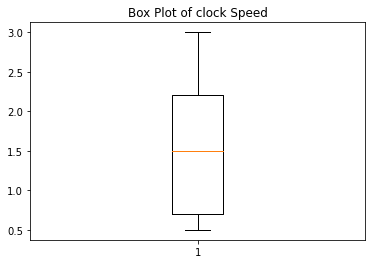

In [8]:
plt.boxplot(data['clock_speed'])
plt.title('Box Plot of clock Speed')

Text(0.5, 1.0, 'Box Plot of m_dep')

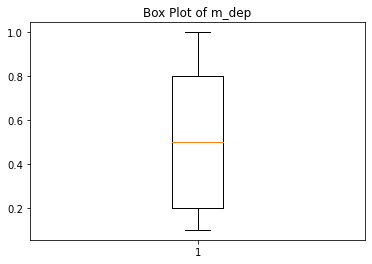

In [9]:
plt.boxplot(data['m_dep'])
plt.title('Box Plot of m_dep')

Text(0.5, 1.0, 'Box Plot of price_range')

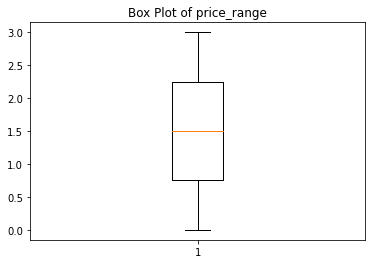

In [10]:
plt.boxplot(data['price_range'])
plt.title('Box Plot of price_range')

Text(0.5, 1.0, 'Box Plot of clock Speed')

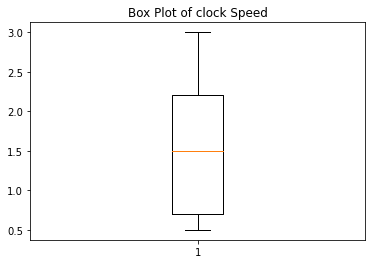

In [11]:
plt.boxplot(data['clock_speed'])
plt.title('Box Plot of clock Speed')

In [12]:
#Splitting the data set

In [13]:
x = data.drop(['price_range'], axis=1)
y = data['price_range']
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
x_train.shape 

(1600, 20)

# Building Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print ('MSE is:', mean_squared_error(y_test,y_pred))
print('R squared value is:', r2_score(y_test, y_pred))

MSE is: 0.10469290211930665
R squared value is: 0.9215339010437136


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [19]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.6325


In [20]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.6325
Weighted F1-score: 0.63

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



In [21]:
confusion_matrix(y_test, y_pred)

array([[79, 25,  1,  0],
       [17, 46, 20,  8],
       [ 0, 17, 46, 29],
       [ 0,  1, 29, 82]], dtype=int64)

# KNN model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [23]:
acc_values

[0.9275,
 0.93,
 0.9425,
 0.9425,
 0.955,
 0.94,
 0.955,
 0.95,
 0.95,
 0.9425,
 0.95,
 0.94]

Text(0, 0.5, 'Accuracy')

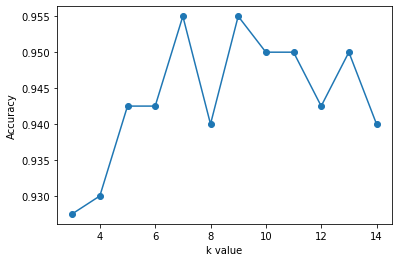

In [24]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [25]:
classifier = KNeighborsClassifier(n_neighbors= 10, metric= 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [26]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.93      0.96      0.94        91
           2       0.89      0.92      0.91        92
           3       1.00      0.92      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [27]:
confusion_matrix(y_test, y_pred)

array([[105,   0,   0,   0],
       [  3,  87,   1,   0],
       [  0,   7,  85,   0],
       [  0,   0,   9, 103]], dtype=int64)

In [2]:
data.describe()

NameError: name 'data' is not defined

# Standard Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [32]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.9525
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.92      0.98      0.95        91
           2       0.91      0.90      0.91        92
           3       0.99      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [33]:
confusion_matrix(y_test, y_pred)

array([[105,   0,   0,   0],
       [  2,  89,   0,   0],
       [  0,   8,  83,   1],
       [  0,   0,   8, 104]], dtype=int64)

In [34]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=14, metric= 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

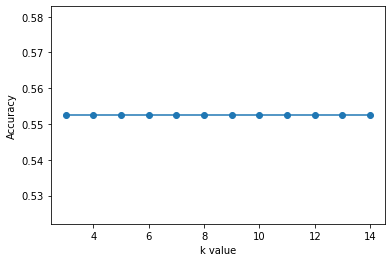

In [35]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [36]:
classifier = KNeighborsClassifier(n_neighbors=12, metric= 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [37]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.5575
Weighted F1-score: 0.56

Classification Report

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       105
           1       0.42      0.46      0.44        91
           2       0.39      0.45      0.42        92
           3       0.78      0.55      0.65       112

    accuracy                           0.56       400
   macro avg       0.57      0.55      0.55       400
weighted avg       0.58      0.56      0.56       400



In [38]:
confusion_matrix(y_test, y_pred)

array([[78, 24,  3,  0],
       [28, 42, 18,  3],
       [ 9, 27, 41, 15],
       [ 1,  6, 43, 62]], dtype=int64)

 # Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model=DecisionTreeClassifier(criterion='entropy')

In [41]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_pred=dt_model.predict(x_test)

In [43]:
print('Accuracy on DecisionTree model is',accuracy_score(y_test,y_pred))

Accuracy on DecisionTree model is 0.8525


In [44]:
y_test.value_counts()

3    112
0    105
2     92
1     91
Name: price_range, dtype: int64

In [45]:
confusion_matrix(y_test,y_pred)

array([[95, 10,  0,  0],
       [ 7, 80,  4,  0],
       [ 0, 15, 71,  6],
       [ 0,  0, 17, 95]], dtype=int64)

# SVM

In [46]:
# Linear SVM

In [47]:
from sklearn.svm import SVC

In [48]:
svm_linear=SVC(kernel='linear')

In [49]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
y_pred=svm_linear.predict(x_test)

In [51]:
print('Accuracy using linear svm  is',accuracy_score(y_test,y_pred))

Accuracy using linear svm  is 0.95


# Polynomial SVM

In [52]:
SVM_poly=SVC(kernel='poly',degree=3)

In [53]:
SVM_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [54]:
y_pred=SVM_poly.predict(x_test)

In [55]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7925


# Radial SVM

In [56]:
svm_radial=SVC(kernel='rbf')

In [57]:
svm_radial.fit(x_train,y_train)

SVC()

In [58]:
y_pred = svm_radial.predict(x_test)

In [59]:
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.8825


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [62]:
print ("Accuracy on Random Forest mode is:", accuracy_score(y_test,y_test))

Accuracy on Random Forest mode is: 1.0


In [63]:
y_test.value_counts()

3    112
0    105
2     92
1     91
Name: price_range, dtype: int64

# Evaluate the performance of the model

In [65]:
from sklearn.metrics import f1_score,confusion_matrix


In [66]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.86
Weighted F1-score: 0.86

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       105
           1       0.82      0.85      0.83        91
           2       0.74      0.79      0.77        92
           3       0.95      0.82      0.88       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



# Feature importance in RF model

In [73]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

ram              48.263847
battery_power     7.981219
px_height         5.541323
px_width          5.352104
int_memory        3.891698
mobile_wt         3.784164
talk_time         3.322719
sc_w              2.875374
sc_h              2.798660
pc                2.741627
clock_speed       2.619241
fc                2.440608
m_dep             2.265168
n_cores           1.983537
blue              0.778634
dual_sim          0.778626
three_g           0.684925
touch_screen      0.664777
four_g            0.630369
wifi              0.601379
dtype: float64

# Distribution of Prediction Probablities

In [ ]:
threshold=0.22
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred=(y_pred_prob>threshold).astype(int)
                                    

In [ ]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

# Fine tuning of Parameters

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [ ]:
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

In [ ]:
y_pred=gb.predict (x_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

# Extreme Gradient Boosting


In [ ]:
! pip install xgboost

In [ ]:
from xgboost import XGBClassifier
    

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb.fit(x_train,y_train)

In [ ]:
y_pred=xgb.predict(x_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

# Conclusion


# The accuracy obtained from Linear SVM is 0.95 , comparing with other classification models it  have higher accuracy.